<a href="https://colab.research.google.com/github/A-Rodano/A-Rodano/blob/main/New_PMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/libraries.ipynb"

'/content/drive/MyDrive/Colab Notebooks/libraries.ipynb'


In [ ]:
%run "/content/drive/MyDrive/Colab Notebooks/libraries.ipynb"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

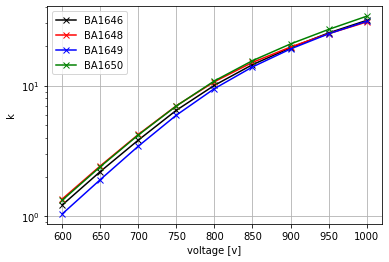

In [ ]:
def panda_from_gspreadsheet(key, sheet_name='Sheet1', header=0):
  # google spredsheet TO panda dataframe 
  # remember to abilitate the public sharing of the data
  url = 'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'.format(
      key=key, sheet_name=sheet_name.replace(' ', '%20'))
  return pd.read_csv(url, header=header)

###  data plot from 02/12/2021   ###

### x-axis  ###
v = 600, 650, 700, 750, 800, 850, 900, 950, 1000 

### y-axis ###
k_BA1646 = 1.2228, 2.2036, 3.8362, 6.4937, 10.0752, 14.4992, 19.5311, 25.364, 31.6308
k_BA1648 = 1.3588, 2.4332, 4.2377, 7.0305, 10.7374, 15.0917, 19.7906, 25.0335, 30.7423 
k_BA1649 = 1.0442, 1.9113, 3.4484, 5.9568, 9.5049, 13.9288, 19.1243, 24.9657, 31.1403
k_BA1650 = 1.3285, 2.3996, 4.1982, 7.0028, 10.8987, 15.5593, 20.8972, 26.9786, 34.0445

### name of each line  ####
plt.plot(v, k_BA1646, label="BA1646", color='black', marker='x')
plt.plot(v, k_BA1648, label="BA1648", color='red', marker='x')
plt.plot(v, k_BA1649, label="BA1649", color='blue', marker='x')
plt.plot(v, k_BA1650, label="BA1650", color='green', marker='x')

### axis label
plt.xlabel('voltage [v]')
plt.ylabel(' k ')

plt.yscale('log')
plt.legend()
plt.grid()


No handles with labels found to put in legend.


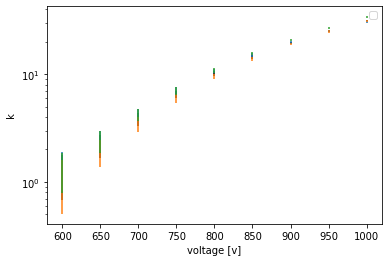

In [ ]:
v = 600, 650, 700, 750, 800, 850, 900, 950, 1000 

k_BA1646 = 1.2228, 2.2036, 3.8362, 6.4937, 10.0752, 14.4992, 19.5311, 25.364, 31.6308
k_BA1648 = 1.3588, 2.4332, 4.2377, 7.0305, 10.7374, 15.0917, 19.7906, 25.0335, 30.7423 
k_BA1649 = 1.0442, 1.9113, 3.4484, 5.9568, 9.5049, 13.9288, 19.1243, 24.9657, 31.1403
k_BA1650 = 1.3285, 2.3996, 4.1982, 7.0028, 10.8987, 15.5593, 20.8972, 26.9786, 34.0445

fig, ax = plt.subplots()
ax.errorbar(v, k_BA1646, xerr=0, yerr=0.54, fmt='none', color='black')
ax.errorbar(v, k_BA1648, xerr=0, yerr=0.54, fmt='none', )
ax.errorbar(v, k_BA1649, xerr=0, yerr=0.54, fmt='none')
ax.errorbar(v, k_BA1650, xerr=0, yerr=0.54, fmt='none')

plt.xlabel('voltage [v]')
plt.ylabel(' k ')

plt.yscale('log')
plt.legend()
#plt.grid()

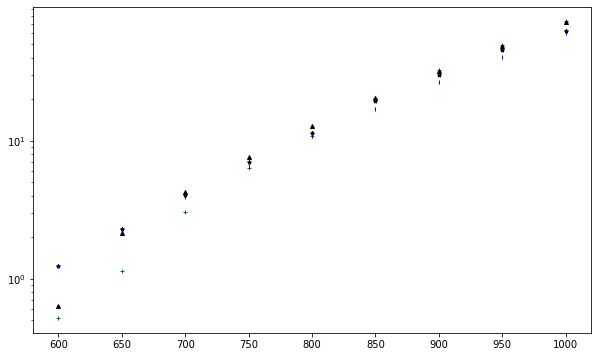

In [ ]:
### plot of data from 03/12/2021
fig, ax = plt.subplots( figsize=(10,6))
BA1650 = panda_from_gspreadsheet(key='186jaMIan9JliWwkcuxou4lpA5mbm8vMqjYsFi3qJehU', sheet_name='BA1650', header=0)
BA1646 = panda_from_gspreadsheet(key='186jaMIan9JliWwkcuxou4lpA5mbm8vMqjYsFi3qJehU', sheet_name='BA1646', header=0)
BA1648 = panda_from_gspreadsheet(key='186jaMIan9JliWwkcuxou4lpA5mbm8vMqjYsFi3qJehU', sheet_name='BA1648', header=0)
BA1649 = panda_from_gspreadsheet(key='186jaMIan9JliWwkcuxou4lpA5mbm8vMqjYsFi3qJehU', sheet_name='BA1649', header=0)

ax.plot (BA1646.Voltage.values, BA1646.charge.values, 'k*', markersize= 4)
ax.plot (BA1648.Voltage.values, BA1648.charge.values, 'g+', markersize= 4)
ax.plot (BA1649.Voltage.values, BA1649.charge.values, 'k^', markersize= 4)
ax.plot (BA1650.Voltage.values, BA1650.charge.values, 'b|', markersize= 4)


ax.set_yscale('log')
plt.show()

In [ ]:
### plot of data from 03/12/2021
fig, ax = plt.subplots( 2,2, figsize=(10,6))
BA1650 = panda_from_gspreadsheet(key='186jaMIan9JliWwkcuxou4lpA5mbm8vMqjYsFi3qJehU', sheet_name='BA1650', header=0)
BA1646 = panda_from_gspreadsheet(key='186jaMIan9JliWwkcuxou4lpA5mbm8vMqjYsFi3qJehU', sheet_name='BA1646', header=0)
BA1648 = panda_from_gspreadsheet(key='186jaMIan9JliWwkcuxou4lpA5mbm8vMqjYsFi3qJehU', sheet_name='BA1648', header=0)
BA1649 = panda_from_gspreadsheet(key='186jaMIan9JliWwkcuxou4lpA5mbm8vMqjYsFi3qJehU', sheet_name='BA1649', header=0)

ax[0,0].plot (BA1646.Voltage.values, BA1646.Mean_pWb.values, 'k*', markersize= 4)
ax[0,1].plot (BA1648.Voltage.values, BA1648.Mean_pWb.values, 'g+', markersize= 4)
ax[1,0].plot (BA1649.Voltage.values, BA1649.Mean_pWb.values, 'k^', markersize= 4)
ax[1,1].plot (BA1650.Voltage.values, BA1650.Mean_pWb.values, 'b|', markersize= 4)


ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

plt.show()


In [ ]:
BA1650

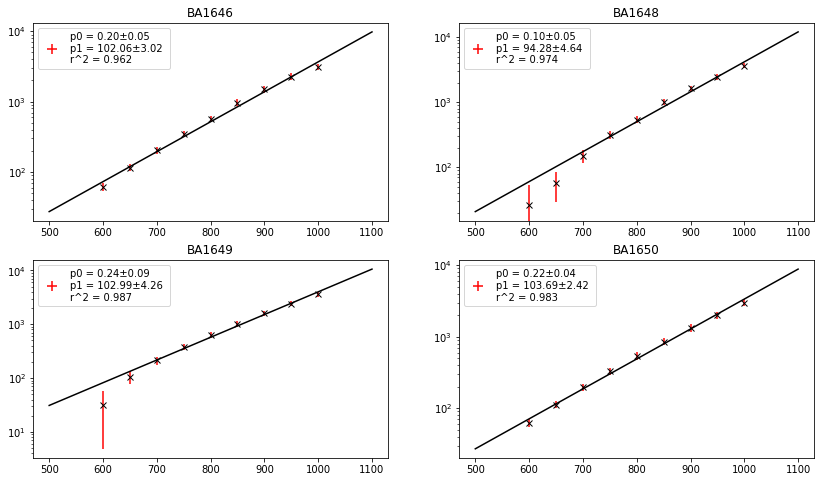

In [ ]:
def pmt_gain(v, p0, p1): 
    return p0*np.exp(v/p1)

par1, cov1 = curve_fit(pmt_gain, BA1646.Voltage.values[:], BA1646.Mean_pWb.values[:], p0=[1,120], sigma=BA1646.Sdev_pWb.values[:] )
par2, cov2 = curve_fit(pmt_gain, BA1648.Voltage.values[:], BA1648.Mean_pWb.values[:], p0=[1,120], sigma=BA1648.Sdev_pWb.values[:] )
par3, cov3 = curve_fit(pmt_gain, BA1649.Voltage.values[:], BA1649.Mean_pWb.values[:], p0=[1,120], sigma=BA1649.Sdev_pWb.values[:] )
par4, cov4 = curve_fit(pmt_gain, BA1650.Voltage.values[:], BA1650.Mean_pWb.values[:], p0=[1,120], sigma=BA1650.Sdev_pWb.values[:] )

err1  = np.sqrt(np.diag(cov1))
err2  = np.sqrt(np.diag(cov2))
err3  = np.sqrt(np.diag(cov3))
err4  = np.sqrt(np.diag(cov4))

# fit between this two numbers
x= np.linspace(500, 1100, num=100)

fig, ax = plt.subplots(2,2, figsize=(14,8))

ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

ax[0,0].plot (x, pmt_gain(x ,*par1), 'k-')
ax[0,1].plot (x, pmt_gain(x ,*par2), 'k-')
ax[1,0].plot (x, pmt_gain(x ,*par3), 'k-')
ax[1,1].plot (x, pmt_gain(x ,*par4), 'k-')

ax[0,0].plot (BA1646.Voltage.values, BA1646.Mean_pWb.values, 'kx')
ax[0,1].plot (BA1648.Voltage.values, BA1648.Mean_pWb.values, 'kx')
ax[1,0].plot (BA1649.Voltage.values, BA1649.Mean_pWb.values, 'kx')
ax[1,1].plot (BA1650.Voltage.values, BA1650.Mean_pWb.values, 'kx')

r21=r2_score(BA1646.Mean_pWb.values, pmt_gain(BA1646.Voltage.values, *par1))
r22=r2_score(BA1648.Mean_pWb.values, pmt_gain(BA1648.Voltage.values, *par2))
r23=r2_score(BA1649.Mean_pWb.values, pmt_gain(BA1649.Voltage.values, *par3))
r24=r2_score(BA1650.Mean_pWb.values, pmt_gain(BA1650.Voltage.values, *par4))

### error bars 
ax[0,0].errorbar(BA1646.Voltage.values, BA1646.Mean_pWb.values, xerr=0, yerr=BA1646.Sdev_pWb.values, fmt='none', color='red', 
                 label='p0 = {0:.2f}±{1:.2f}\np1 = {2:.2f}±{3:.2f} \nr^2 = {4:.3f}'.format(par1[0], err1[0], par1[1], err1[1], r21))
ax[0,1].errorbar(BA1648.Voltage.values, BA1648.Mean_pWb.values, xerr=0, yerr=BA1648.Sdev_pWb.values, fmt='none', color='red',
                 label='p0 = {0:.2f}±{1:.2f}\np1 = {2:.2f}±{3:.2f} \nr^2 = {4:.3f}'.format(par2[0], err2[0], par2[1], err2[1], r22))
ax[1,0].errorbar(BA1649.Voltage.values, BA1649.Mean_pWb.values, xerr=0, yerr=BA1649.Sdev_pWb.values, fmt='none', color='red',
                 label='p0 = {0:.2f}±{1:.2f}\np1 = {2:.2f}±{3:.2f} \nr^2 = {4:.3f}'.format(par3[0], err3[0], par3[1], err3[1], r23))
ax[1,1].errorbar(BA1650.Voltage.values, BA1650.Mean_pWb.values, xerr=0, yerr=BA1650.Sdev_pWb.values, fmt='none', color='red', 
                 label='p0 = {0:.2f}±{1:.2f}\np1 = {2:.2f}±{3:.2f} \nr^2 = {4:.3f}'.format(par4[0], err4[0], par4[1], err4[1], r24))
#             must be         0       1             2       3               4


# add titles
ax[0,0].set_title('BA1646')
ax[0,1].set_title('BA1648')
ax[1,0].set_title('BA1649')
ax[1,1].set_title('BA1650')

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()



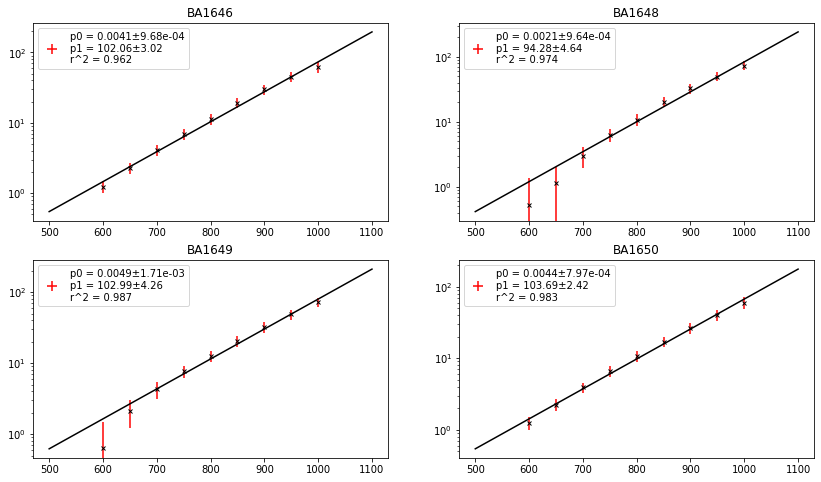

In [ ]:
###   error + current 

par1, cov1 = curve_fit(pmt_gain, BA1646.Voltage.values[:], BA1646.charge.values[:], p0=[0.6,120], sigma=BA1646.error_charge.values[:] )
par2, cov2 = curve_fit(pmt_gain, BA1648.Voltage.values[:], BA1648.charge.values[:], p0=[0.6,120], sigma=BA1648.error_charge.values[:] )
par3, cov3 = curve_fit(pmt_gain, BA1649.Voltage.values[:], BA1649.charge.values[:], p0=[0.6,120], sigma=BA1649.error_charge.values[:] )
par4, cov4 = curve_fit(pmt_gain, BA1650.Voltage.values[:], BA1650.charge.values[:], p0=[0.6,120], sigma=BA1650.error_charge.values[:] )

err1  = np.sqrt(np.diag(cov1))
err2  = np.sqrt(np.diag(cov2))
err3  = np.sqrt(np.diag(cov3))
err4  = np.sqrt(np.diag(cov4))

# fit between this two numbers
x= np.linspace(500, 1100, num=100)

fig, ax = plt.subplots(2,2, figsize=(14,8))

ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

ax[0,0].plot (x, pmt_gain(x ,*par1), 'k-')
ax[0,1].plot (x, pmt_gain(x ,*par2), 'k-')
ax[1,0].plot (x, pmt_gain(x ,*par3), 'k-')
ax[1,1].plot (x, pmt_gain(x ,*par4), 'k-')

ax[0,0].plot (BA1646.Voltage.values, BA1646.charge.values, 'kx', markersize= 4)
ax[0,1].plot (BA1648.Voltage.values, BA1648.charge.values, 'kx', markersize= 4)
ax[1,0].plot (BA1649.Voltage.values, BA1649.charge.values, 'kx', markersize= 4)
ax[1,1].plot (BA1650.Voltage.values, BA1650.charge.values, 'kx', markersize= 4)

####            actual value        -        value made by fit
r21=r2_score(BA1646.charge.values, pmt_gain(BA1646.Voltage.values, *par1))
r22=r2_score(BA1648.charge.values, pmt_gain(BA1648.Voltage.values, *par2))
r23=r2_score(BA1649.charge.values, pmt_gain(BA1649.Voltage.values, *par3))
r24=r2_score(BA1650.charge.values, pmt_gain(BA1650.Voltage.values, *par4))

### error bars 
ax[0,0].errorbar(BA1646.Voltage.values, BA1646.charge.values, xerr=0, yerr=BA1646.error_charge.values, fmt='none', color='red', 
                 label='p0 = {0:.4f}±{1:.2e}\np1 = {2:.2f}±{3:.2f} \nr^2 = {4:.3f}'.format(par1[0], err1[0], par1[1], err1[1], r21))
ax[0,1].errorbar(BA1648.Voltage.values, BA1648.charge.values, xerr=0, yerr=BA1648.error_charge.values, fmt='none', color='red',
                 label='p0 = {0:.4f}±{1:.2e}\np1 = {2:.2f}±{3:.2f} \nr^2 = {4:.3f}'.format(par2[0], err2[0], par2[1], err2[1], r22))
ax[1,0].errorbar(BA1649.Voltage.values, BA1649.charge.values, xerr=0, yerr=BA1649.error_charge.values, fmt='none', color='red',
                 label='p0 = {0:.4f}±{1:.2e}\np1 = {2:.2f}±{3:.2f} \nr^2 = {4:.3f}'.format(par3[0], err3[0], par3[1], err3[1], r23))
ax[1,1].errorbar(BA1650.Voltage.values, BA1650.charge.values, xerr=0, yerr=BA1650.error_charge.values, fmt='none', color='red', 
                 label='p0 = {0:.4f}±{1:.2e}\np1 = {2:.2f}±{3:.2f} \nr^2 = {4:.3f}'.format(par4[0], err4[0], par4[1], err4[1], r24))
#             must be         0       1             2       3               4

# add titles
ax[0,0].set_title('BA1646')
ax[0,1].set_title('BA1648')
ax[1,0].set_title('BA1649')
ax[1,1].set_title('BA1650')

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

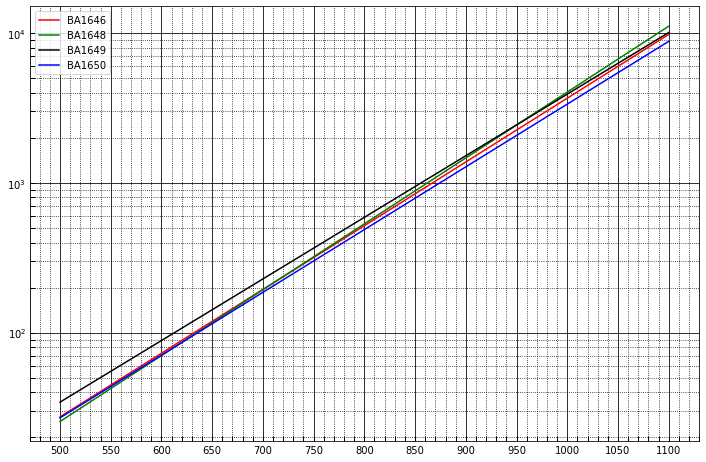

In [ ]:
### all on the same graph

par1, cov1 = curve_fit(pmt_gain, BA1646.Voltage.values[:], BA1646.Mean_pWb.values[:], p0=[0.6,120], sigma=BA1646.Sdev_pWb.values[:] )
par2, cov2 = curve_fit(pmt_gain, BA1648.Voltage.values[2:], BA1648.Mean_pWb.values[2:], p0=[0.6,120], sigma=BA1648.Sdev_pWb.values[2:] )
par3, cov3 = curve_fit(pmt_gain, BA1649.Voltage.values[1:], BA1649.Mean_pWb.values[1:], p0=[0.6,120], sigma=BA1649.Sdev_pWb.values[1:] )
par4, cov4 = curve_fit(pmt_gain, BA1650.Voltage.values[:], BA1650.Mean_pWb.values[:], p0=[0.6,120], sigma=BA1650.Sdev_pWb.values[:] )

# fit between this two numbers
x= np.linspace(500, 1100, num=100)

# plot size
fig, ax = plt.subplots( figsize=(12,8))

plt.yscale('log')

plt.plot (x, pmt_gain(x ,*par1), 'r-', label="BA1646")
plt.plot (x, pmt_gain(x ,*par2), 'g-', label="BA1648")
plt.plot (x, pmt_gain(x ,*par3), 'k-', label="BA1649")
plt.plot (x, pmt_gain(x ,*par4), 'b-', label="BA1650")


plt.tick_params(axis="both", direction='in', which="both", length=5, width=1, colors='k',
                grid_color='grey')

plt.legend()

###      grid      ###

          # major ticks
ax.xaxis.set_major_locator(MultipleLocator(50))
#ax.yaxis.set_major_locator(MultipleLocator(50))
          # minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(10))
#ax.yaxis.set_minor_locator(MultipleLocator(50))
          # change style of ticks
ax.grid(which='major', color='k', linestyle='-')
ax.grid(which='minor', color='k', linestyle=':')

In [ ]:
BA1650 = panda_from_gspreadsheet(key='186jaMIan9JliWwkcuxou4lpA5mbm8vMqjYsFi3qJehU', sheet_name='BA1650', header=0)
# df e' solo un nome
BA1650

,Voltage,Mean_pWb,Sdev_pWb,charge,error_charge
0,600,62.031,7.664,1.24062,0.242357
1,650,112.070,12.880,2.24140,0.407301
2,700,194.850,21.300,3.89700,0.673565
3,750,327.490,35.430,6.54980,1.120395
4,800,540.540,63.280,10.81080,2.001089
5,850,854.660,93.420,17.09320,2.954200
6,900,1332.500,151.700,26.65000,4.797175
7,950,2022.100,227.300,40.44200,7.187857
8,1000,3003.900,342.100,60.07800,10.818152


In [ ]:
par, cov = curve_fit(pmt_gain, BA1650.Voltage.values[:], BA1650.Mean_pWb.values[:], p0=[0.6,120], sigma=BA1650.Sdev_pWb.values[:] )
                                                   ### insert in [:]  a range of value 
err  = np.sqrt(np.diag(cov))

print(par)
print(err)

[  0.21768527 103.69073473]
[0.03983225 2.41557163]


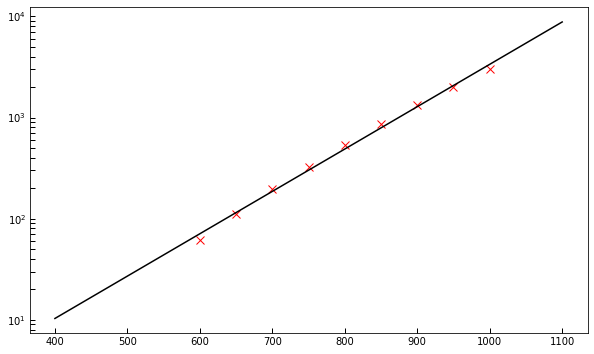

In [ ]:

# fit between this two numbers
x= np.linspace(400, 1100, num=100)

# plot size
fig, ax = plt.subplots( figsize=(10,6))

plt.plot (BA1650.Voltage.values, BA1650.Mean_pWb.values, 'rx', markersize= 8)
plt.plot (x, pmt_gain(x ,*par), 'k-')


plt.tick_params(axis="both", direction='in', which="both", length=5, width=1, colors='k',
                grid_color='grey')
plt.yscale('log')


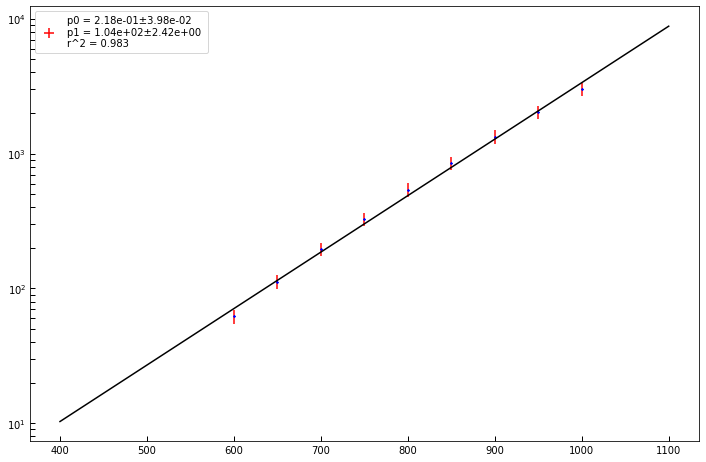

In [ ]:
     ####    error bars       ######

# fit between this two numbers
x= np.linspace(400, 1100, num=100)

# plot size
fig, ax = plt.subplots( figsize=(12,8))

plt.plot (BA1650.Voltage.values, BA1650.Mean_pWb.values, 'b*', markersize= 2)
plt.plot (x, pmt_gain(x ,*par), 'k-')

### error bars 
r2=r2_score(BA1650.Mean_pWb.values, pmt_gain(BA1650.Voltage.values, *par))
ax.errorbar(BA1650.Voltage.values, BA1650.Mean_pWb.values, xerr=0, yerr=BA1650.Sdev_pWb.values, fmt='none', color='red',
            label='p0 = {0:.2e}±{1:.2e}\np1 = {2:.2e}±{3:.2e} \nr^2 = {4:.3f}'.format(par[0], err[0], par[1], err[1], r2))
#             must be    0       1              2       3               4

plt.tick_params(axis="both", direction='in', which="both", length=5, width=1, colors='k',
                grid_color='grey')
plt.yscale('log')
plt.legend()

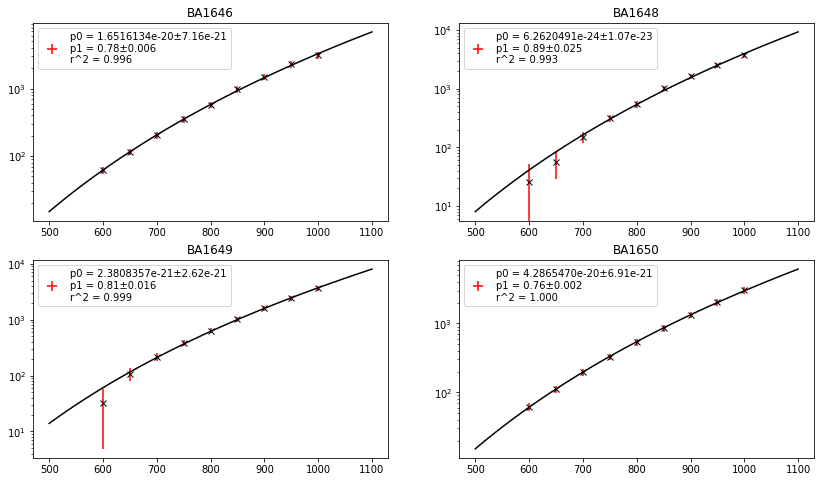

In [ ]:
def pmt_actual_gain(v, p0, p1):
  return p0*v**(p1*10)

###      Gain = A*V**(kn)
#  A constant 
#  V : the applied voltage (across PMT)
#  K : a constant determined by the electrode structure and materal
#  n : the number of dynode stages


par1, cov1 = curve_fit(pmt_actual_gain, BA1646.Voltage.values[:], BA1646.Mean_pWb.values[:], p0=[0,0.8], sigma=BA1646.Sdev_pWb.values[:] )
par2, cov2 = curve_fit(pmt_actual_gain, BA1648.Voltage.values[:], BA1648.Mean_pWb.values[:], p0=[0,0.8], sigma=BA1648.Sdev_pWb.values[:] )
par3, cov3 = curve_fit(pmt_actual_gain, BA1649.Voltage.values[:], BA1649.Mean_pWb.values[:], p0=[0,0.8], sigma=BA1649.Sdev_pWb.values[:] )
par4, cov4 = curve_fit(pmt_actual_gain, BA1650.Voltage.values[:], BA1650.Mean_pWb.values[:], p0=[0,0.8], sigma=BA1650.Sdev_pWb.values[:] )

err1  = np.sqrt(np.diag(cov1))
err2  = np.sqrt(np.diag(cov2))
err3  = np.sqrt(np.diag(cov3))
err4  = np.sqrt(np.diag(cov4))

# fit between this two numbers
x= np.linspace(500, 1100, num=100)

fig, ax = plt.subplots(2,2, figsize=(14,8))

ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

ax[0,0].plot (x, pmt_actual_gain(x ,*par1), 'k-')
ax[0,1].plot (x, pmt_actual_gain(x ,*par2), 'k-')
ax[1,0].plot (x, pmt_actual_gain(x ,*par3), 'k-')
ax[1,1].plot (x, pmt_actual_gain(x ,*par4), 'k-')

ax[0,0].plot (BA1646.Voltage.values, BA1646.Mean_pWb.values, 'kx')
ax[0,1].plot (BA1648.Voltage.values, BA1648.Mean_pWb.values, 'kx')
ax[1,0].plot (BA1649.Voltage.values, BA1649.Mean_pWb.values, 'kx')
ax[1,1].plot (BA1650.Voltage.values, BA1650.Mean_pWb.values, 'kx')

r21=r2_score(BA1646.Mean_pWb.values, pmt_actual_gain(BA1646.Voltage.values, *par1))
r22=r2_score(BA1648.Mean_pWb.values, pmt_actual_gain(BA1648.Voltage.values, *par2))
r23=r2_score(BA1649.Mean_pWb.values, pmt_actual_gain(BA1649.Voltage.values, *par3))
r24=r2_score(BA1650.Mean_pWb.values, pmt_actual_gain(BA1650.Voltage.values, *par4))

### error bars 
ax[0,0].errorbar(BA1646.Voltage.values, BA1646.Mean_pWb.values, xerr=0, yerr=BA1646.Sdev_pWb.values, fmt='none', color='red', 
                 label='p0 = {0:.7e}±{1:.2e}\np1 = {2:.2f}±{3:.3f} \nr^2 = {4:.3f}'.format(par1[0], err1[0], par1[1], err1[1], r21))
ax[0,1].errorbar(BA1648.Voltage.values, BA1648.Mean_pWb.values, xerr=0, yerr=BA1648.Sdev_pWb.values, fmt='none', color='red',
                 label='p0 = {0:.7e}±{1:.2e}\np1 = {2:.2f}±{3:.3f} \nr^2 = {4:.3f}'.format(par2[0], err2[0], par2[1], err2[1], r22))
ax[1,0].errorbar(BA1649.Voltage.values, BA1649.Mean_pWb.values, xerr=0, yerr=BA1649.Sdev_pWb.values, fmt='none', color='red',
                 label='p0 = {0:.7e}±{1:.2e}\np1 = {2:.2f}±{3:.3f} \nr^2 = {4:.3f}'.format(par3[0], err3[0], par3[1], err3[1], r23))
ax[1,1].errorbar(BA1650.Voltage.values, BA1650.Mean_pWb.values, xerr=0, yerr=BA1650.Sdev_pWb.values, fmt='none', color='red', 
                 label='p0 = {0:.7e}±{1:.2e}\np1 = {2:.2f}±{3:.3f} \nr^2 = {4:.3f}'.format(par4[0], err4[0], par4[1], err4[1], r24))
#                  must be    0       1             2       3               4

# add titles
ax[0,0].set_title('BA1646')
ax[0,1].set_title('BA1648')
ax[1,0].set_title('BA1649')
ax[1,1].set_title('BA1650')

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

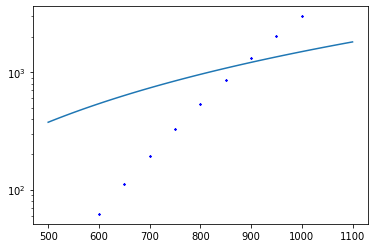

In [ ]:
x = np.linspace(500,1100,100)
plt.yscale('log')
plt.plot(x,pmt_actual_gain(x,0.0015,0.2))
plt.plot (BA1650.Voltage.values, BA1650.Mean_pWb.values, 'b*', markersize= 2)

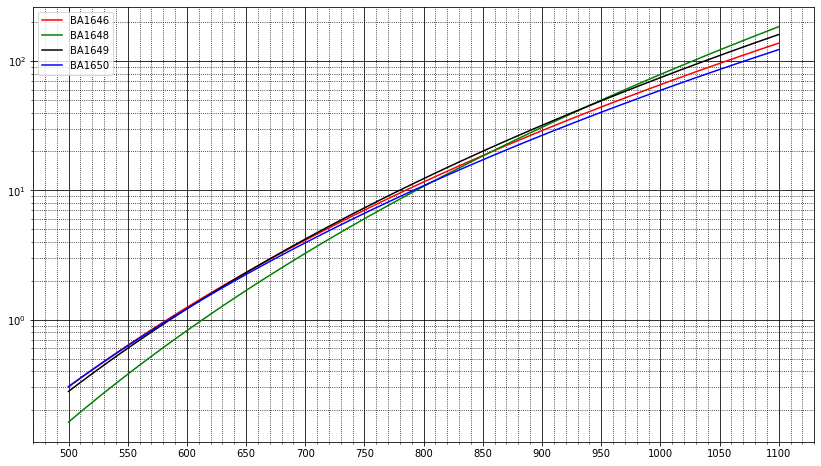

In [ ]:
par1, cov1 = curve_fit(pmt_actual_gain, BA1646.Voltage.values[:], BA1646.charge.values[:], p0=[0,0.8], sigma=BA1646.Sdev_pWb.values[:] )
par2, cov2 = curve_fit(pmt_actual_gain, BA1648.Voltage.values[:], BA1648.charge.values[:], p0=[0,0.8], sigma=BA1648.Sdev_pWb.values[:] )
par3, cov3 = curve_fit(pmt_actual_gain, BA1649.Voltage.values[:], BA1649.charge.values[:], p0=[0,0.8], sigma=BA1649.Sdev_pWb.values[:] )
par4, cov4 = curve_fit(pmt_actual_gain, BA1650.Voltage.values[:], BA1650.charge.values[:], p0=[0,0.8], sigma=BA1650.Sdev_pWb.values[:] )

# fit between this two numbers
x= np.linspace(500, 1100, num=100)

fig, ax = plt.subplots( figsize=(14,8))

plt.yscale('log')

plt.plot (x, pmt_actual_gain(x ,*par1), 'r-', label="BA1646")
plt.plot (x, pmt_actual_gain(x ,*par2), 'g-', label="BA1648")
plt.plot (x, pmt_actual_gain(x ,*par3), 'k-', label="BA1649")
plt.plot (x, pmt_actual_gain(x ,*par4), 'b-', label="BA1650")


plt.legend()

          # major ticks
ax.xaxis.set_major_locator(MultipleLocator(50))
#ax.yaxis.set_major_locator(MultipleLocator(50))
          # minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(10))
#ax.yaxis.set_minor_locator(MultipleLocator(50))
          # change style of ticks
ax.grid(which='major', color='k', linestyle='-')
ax.grid(which='minor', color='k', linestyle=':')



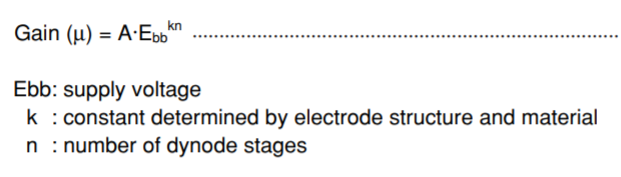